now： 0 0
------进行交叉验证------
now： 0 1
------进行交叉验证------
now： 0 2
------进行交叉验证------
now： 0 3
------进行交叉验证------
now： 0 4
------进行交叉验证------
now： 1 0
------进行交叉验证------
now： 1 1
------进行交叉验证------
now： 1 2
------进行交叉验证------
now： 1 3
------进行交叉验证------
now： 1 4
------进行交叉验证------
now： 2 0
------进行交叉验证------
now： 2 1
------进行交叉验证------
now： 2 2
------进行交叉验证------
now： 2 3
------进行交叉验证------
now： 2 4
------进行交叉验证------
now： 3 0
------进行交叉验证------
now： 3 1
------进行交叉验证------
now： 3 2
------进行交叉验证------
now： 3 3
------进行交叉验证------
now： 3 4
------进行交叉验证------


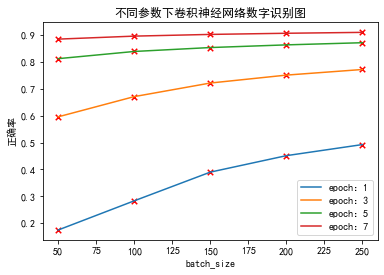

In [5]:
from __future__ import print_function
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
def getdata():
    #提取出训练集和测试集
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    # 采用one-hot编码
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)
    #将测试集和训练集合并，便于后面交叉验证
    data = np.row_stack((x_train,x_test))
    target = np.row_stack((y_train,y_test))
    return data, target

# 构建模型
def get_model():
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5, 5),strides=1,activation='relu',input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
    model.add(Conv2D(filters=12, kernel_size=(5, 5),strides=1,activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
    model.add(Flatten())
    #model.add(Conv2D(filters=120, kernel_size=(5, 5),activation='relu'))
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    # 编译模型，采用多分类的损失函数，用 Adadelta 算法做优化方法
    model.compile(loss='categorical_crossentropy',
                  optimizer='Adadelta',
                  metrics=['accuracy'])
    
    return model

def kcross(data,target,bsize,epoch,sp):
    print("------进行交叉验证------")
    ans=0
    kf = KFold(n_splits=sp, shuffle = True)
    for train, test in kf.split(data):
        #print("第{}次开始".format(i+1))
        model.fit(data[train], target[train],
              batch_size=bsize,
              epochs=epoch,
              verbose=0,
              validation_data=(data[test], target[test]))
        
        score = model.evaluate(data[test], target[test], verbose=0)
        ans+=score[1]
    return ans/sp
#画结果图
def draw(batch_size,y,epoch):
    plt.figure()
    plt.rcParams['font.sans-serif']='SimHei'
    plt.ylabel('正确率')
    plt.xlabel('batch_size')
    plt.title('不同参数下卷积神经网络数字识别图')
    for i in range(len(y)):
        plt.scatter(batch_size, y[i], s=30, c='r', marker='x', linewidths=1)
        plt.plot(batch_size,y[i],label="epoch："+str(epoch[i]))
    plt.legend()
    plt.show()


if __name__=="__main__":
    data,target=getdata()
    model=get_model()
    '''
    设置epoch和baitch_size参数
    y：存储每一次的结果
    '''
    epoch=[1,3,5,7] 
    size=[50,100,150,200,250]
    y=np.zeros([4,5])
    
    for i in range(len(epoch)):
        for j in range(len(size)):
            print("now：",i,j)
            y[i,j]=kcross(data,target,size[j],epoch[i],3)
    draw(size,y,epoch)